In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive
%cd MyDrive
%cd Colab Notebooks
%cd influenza
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import norm, skew 
from scipy import stats
from datetime import date

Mounted at /content/gdrive/
/content/gdrive
/content/gdrive/MyDrive
/content/gdrive/MyDrive/Colab Notebooks
/content/gdrive/MyDrive/Colab Notebooks/influenza


In [35]:
df=pd.read_csv("ILINet.csv")
df_masks=pd.read_csv("Mask.csv")[['state','date','value','sample_size']]

df['formatted_date'] = df.YEAR * 1000 + df.WEEK * 10 + 0
df['date'] = pd.to_datetime(df['formatted_date'], format='%Y%W%w')
df1=df[['REGION','date','%UNWEIGHTED ILI']]
df2=df1[df1['%UNWEIGHTED ILI']!='X']
df2['%UNWEIGHTED ILI']=df2['%UNWEIGHTED ILI'].astype(float)
df2.set_index('date',drop=True,inplace=True)

<ipython-input-35-486ec4a9faf8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['%UNWEIGHTED ILI']=df2['%UNWEIGHTED ILI'].astype(float)


In [39]:
df_masks['date'] = pd.to_datetime(df_masks['date'])
df_masks['value']=df_masks['value'].astype(float)
df_masks.set_index('date',drop=True,inplace=True)

In [40]:
df_masks1=df_masks[(df_masks['value']<100) & (df_masks['value']>0)]
states_m=df_masks1['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'DC', 'ND', 'SD', 'WY'], dtype=object)

In [12]:
df3=df2[(df2['%UNWEIGHTED ILI']<100) & (df2['%UNWEIGHTED ILI']>0)]
states=df3['REGION'].unique()
print(len(states))
df4=df3['2020':]

54


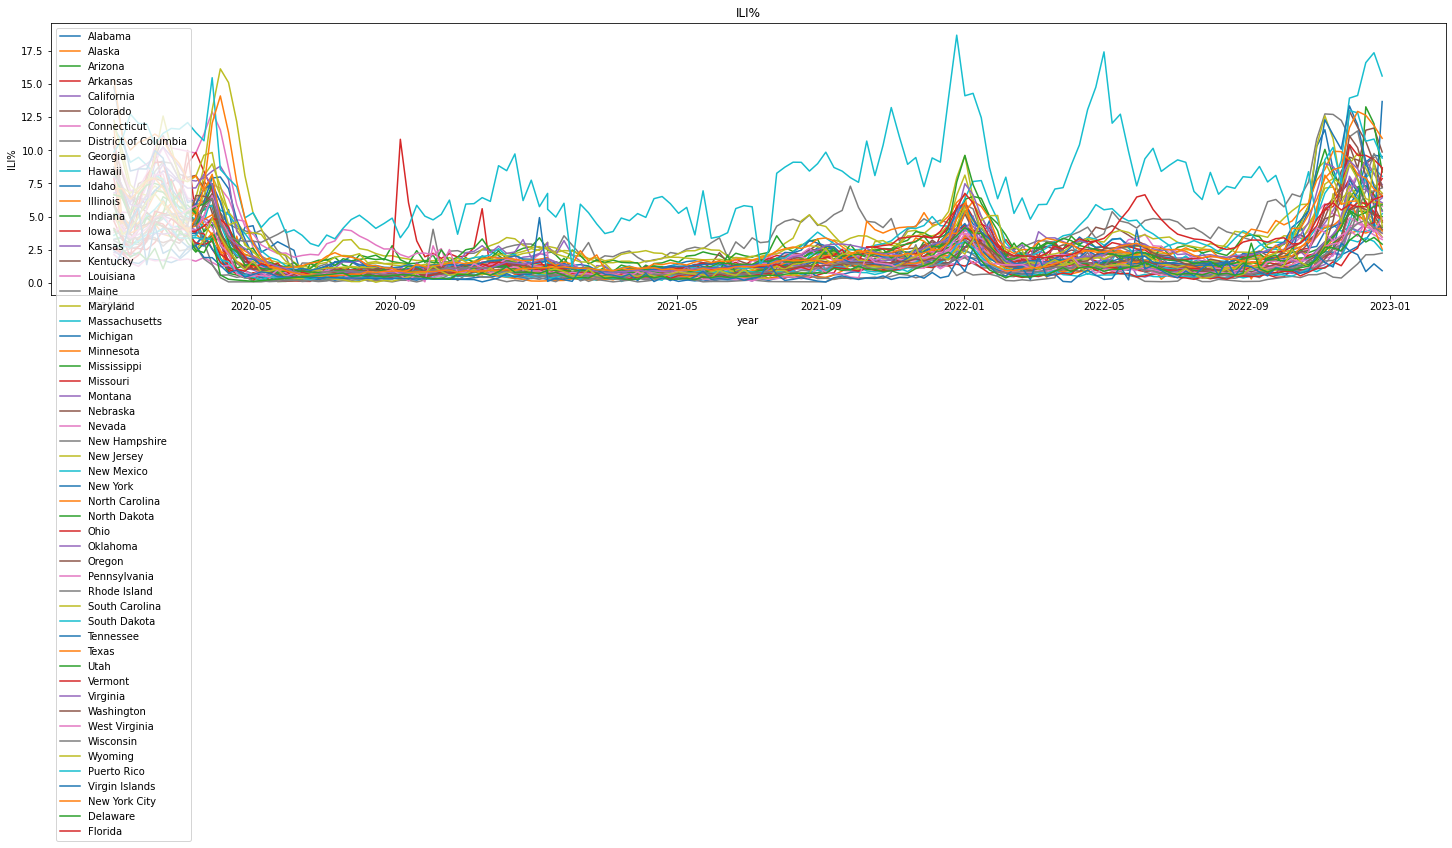

In [13]:
fig, (ax) = plt.subplots(1,figsize=(25,5))
for i in states:
  plt.plot(df4[df4['REGION']==i]['%UNWEIGHTED ILI'],label=i)
  plt.xlabel('year')
  plt.ylabel('ILI%')
  plt.title('ILI%')
  plt.legend(loc='best')

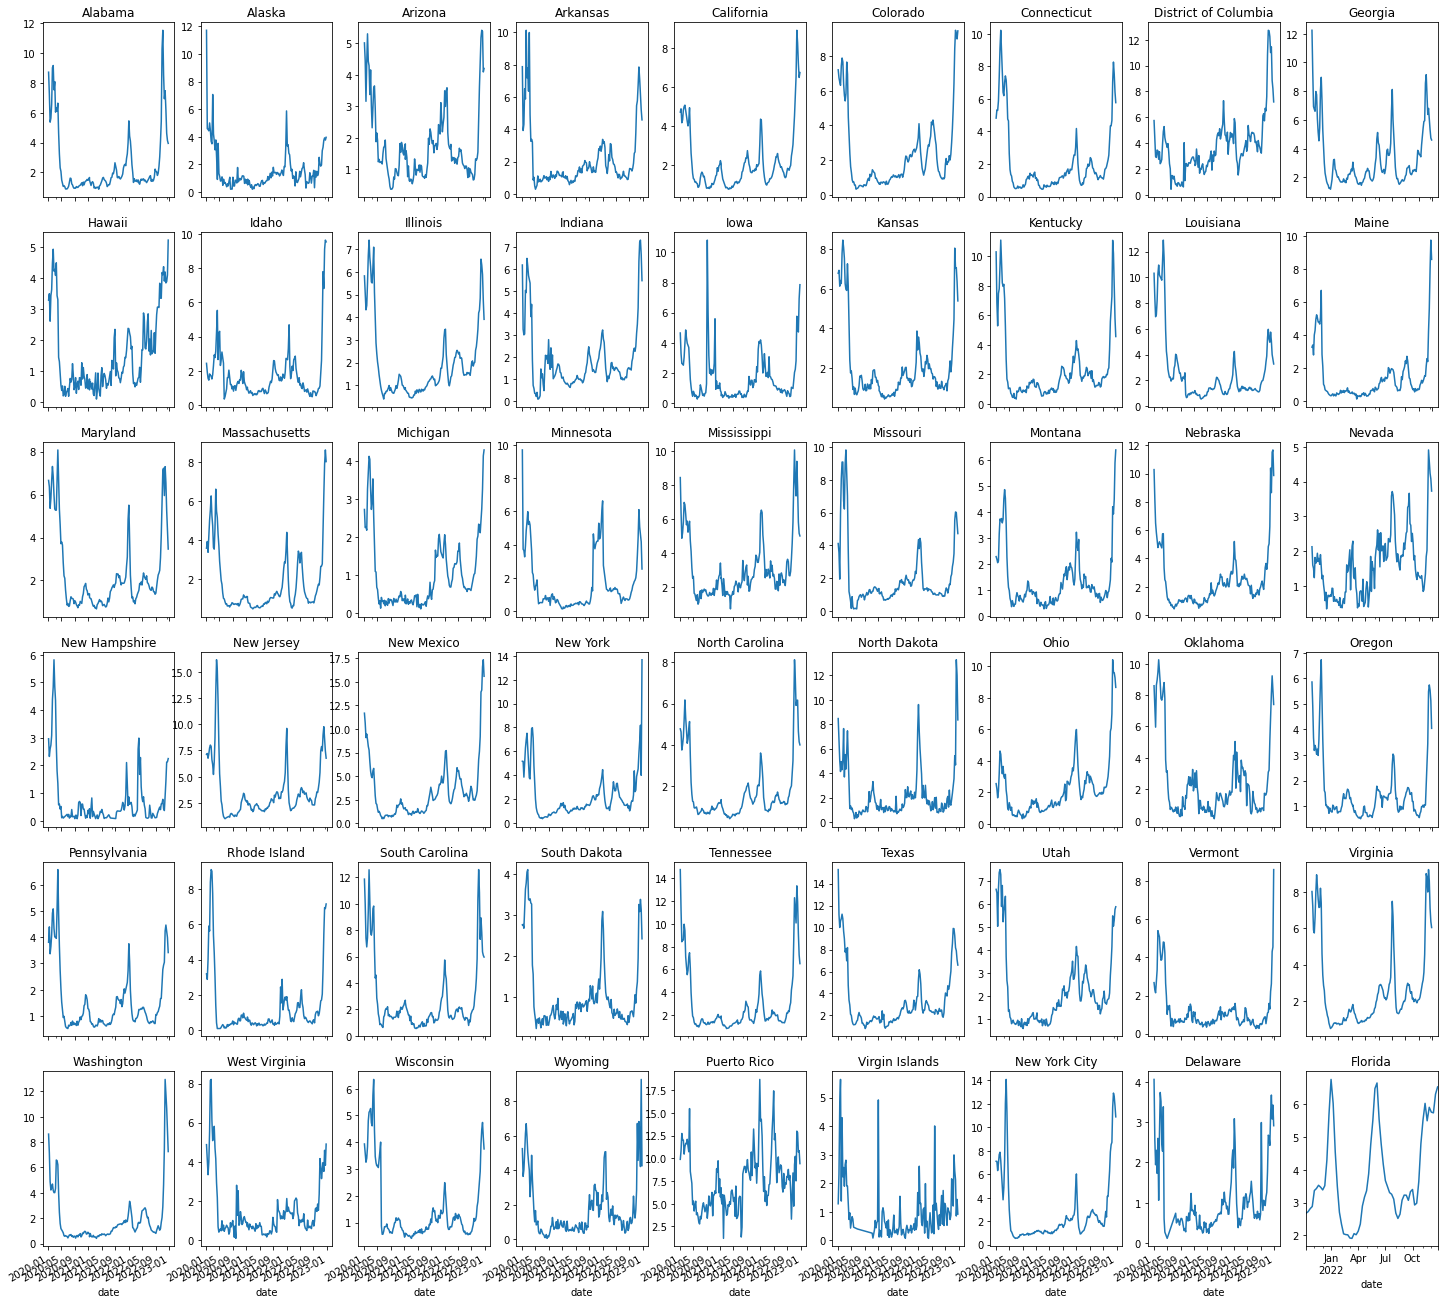

In [ ]:
nrow=6
ncol=9
i=0
fig, axes = plt.subplots(nrow, ncol,figsize=(25,25))
for r in range(nrow):
  for c in range(ncol):
    df4[df4['REGION']==states[i]]['%UNWEIGHTED ILI'].plot(ax=axes[r,c],title=states[i],sharex=True,fontsize=10)
    if i ==len(states)-1:
      break
    i+=1


In [41]:
df_masks1.head()

,state,value,sample_size
date,,,
2021-02-09,AK,91.121495,106.0000
2021-02-09,AL,90.707183,381.0155
2021-02-09,AR,88.645782,293.9873
2021-02-09,AZ,93.294110,632.7712
2021-02-09,CA,96.411049,2437.0384


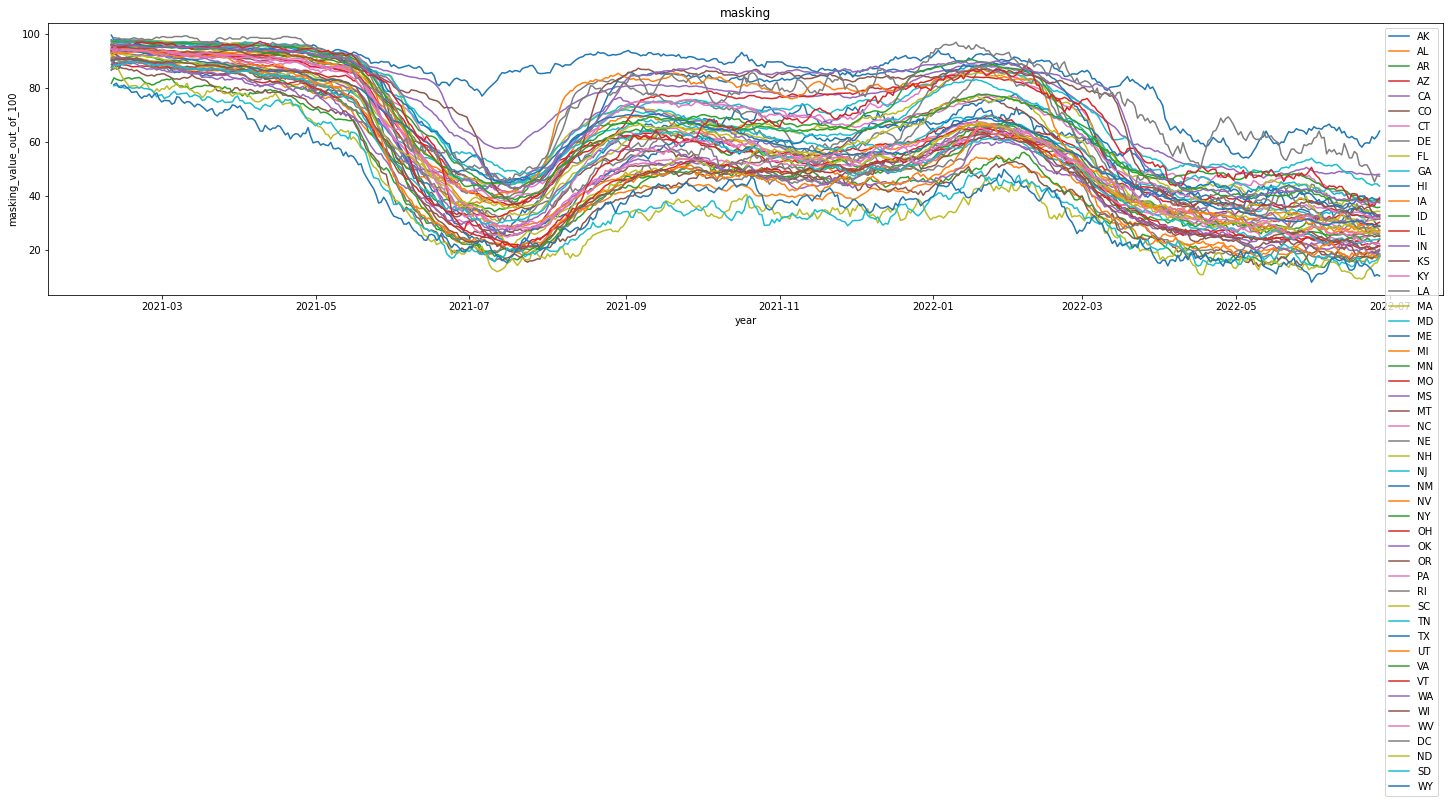

In [42]:
fig, (ax) = plt.subplots(1,figsize=(25,5))
for i in states_m:
  plt.plot(df_masks1[df_masks1['state']==i]['value'],label=i)
  plt.xlabel('year')
  plt.ylabel('masking_value_out_of_100')
  plt.title('masking')
  plt.legend(loc='best')

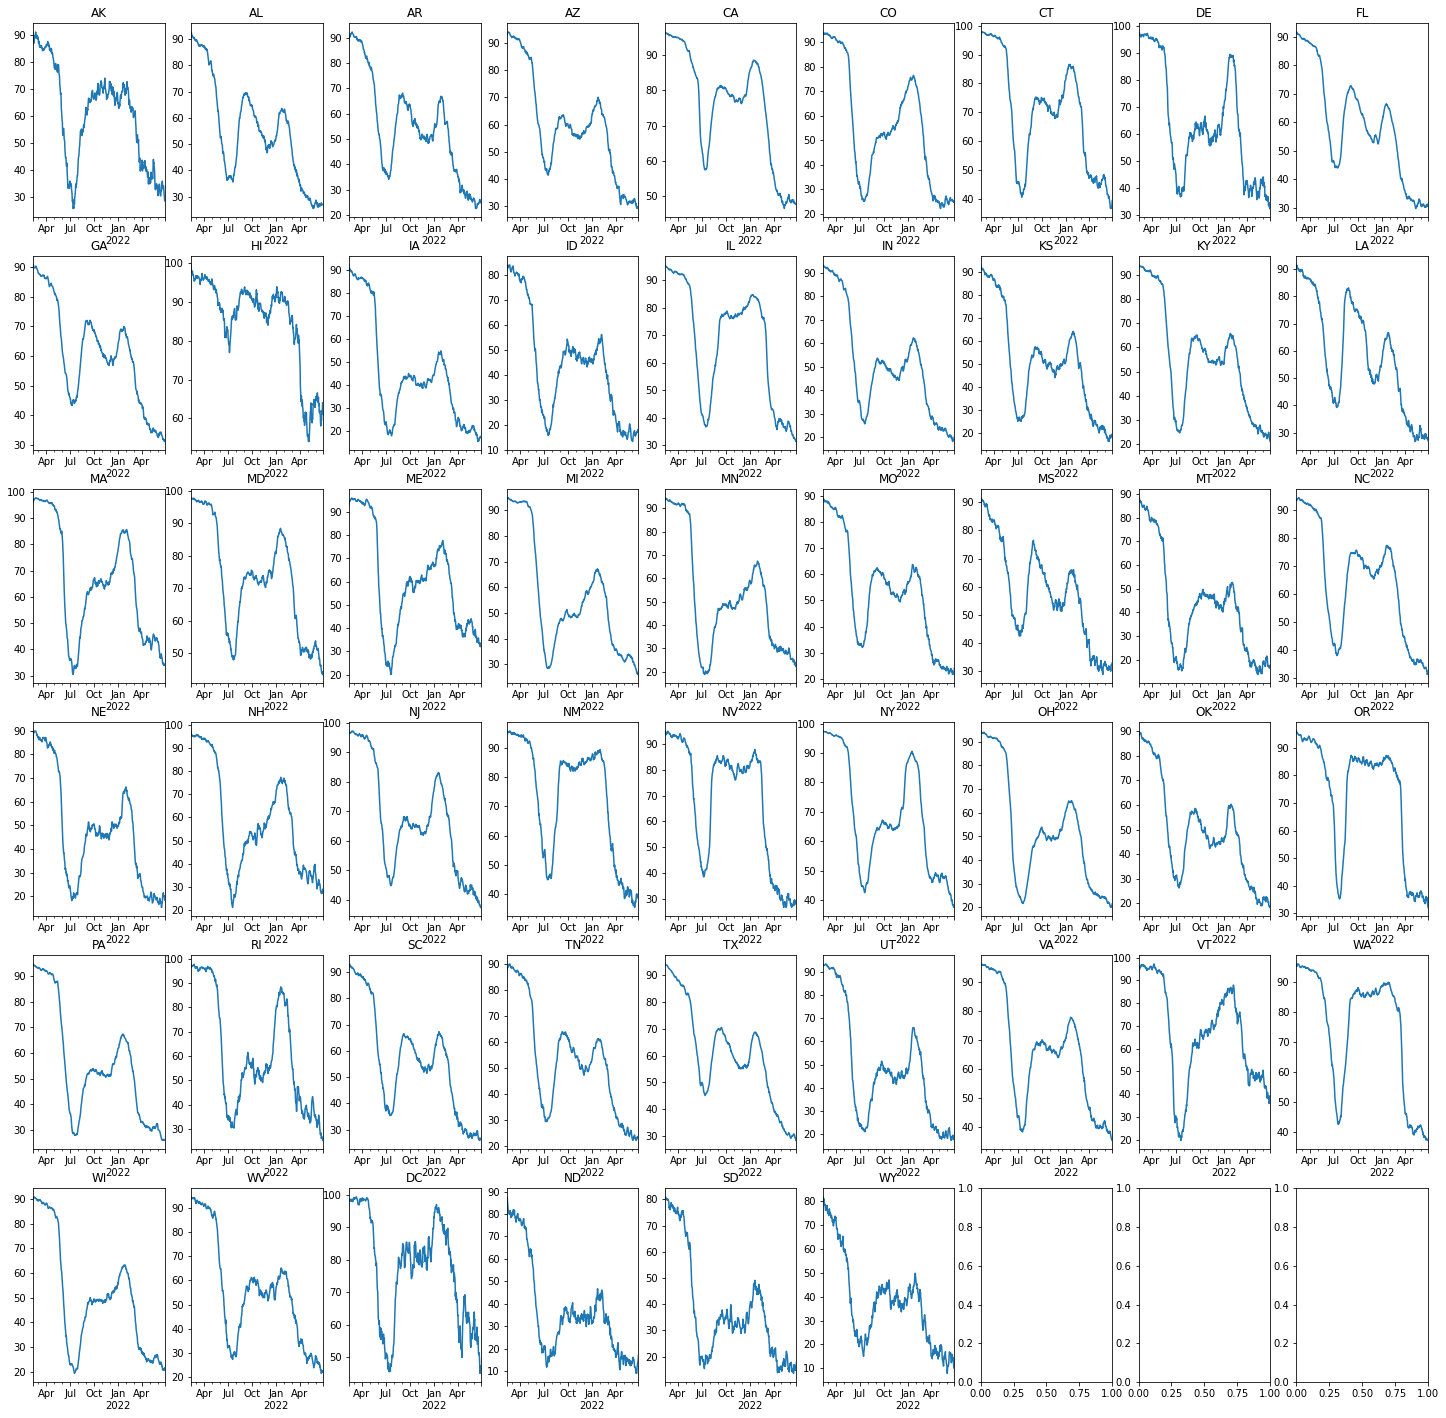

In [46]:
nrow=6
ncol=9
i=0
fig, axes = plt.subplots(nrow, ncol,figsize=(25,25))
for r in range(nrow):
  for c in range(ncol):
    df_masks1[df_masks1['state']==states_m[i]]['value'].plot(ax=axes[r,c],title=states_m[i],xlabel='')
    if i ==len(states_m)-1:
      break
    i+=1

In [59]:
df_policy=pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/United%20States/OxCGRT_USA_latest.csv')[['RegionName',
                                                                                                                                          'Date',
                                                                                                                                          'C1M_School closing',
                                                                                                                                          'H8M_Protection of elderly people']]
df_policy['Date']=pd.to_datetime(df_policy['Date'], format='%Y%m%d')
df_policy.set_index('Date',drop=True,inplace=True)


In [85]:
df_policy1=df_policy[~df_policy['RegionName'].isna()]['2020-03':]
states_p=df_policy1['RegionName'].unique()
#df_policy1[['C1M_School closing','H8M_Protection of elderly people']]=df_policy1[['C1M_School closing','H8M_Protection of elderly people']].astype('object')
print(df_policy1.info())
df_policy1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52836 entries, 2020-03-01 to 2022-12-31
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RegionName                        52836 non-null  object 
 1   C1M_School closing                51860 non-null  float64
 2   H8M_Protection of elderly people  51833 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.6+ MB
None


,RegionName,C1M_School closing,H8M_Protection of elderly people
Date,,,
2020-03-01,Alaska,0.0,0.0
2020-03-02,Alaska,0.0,0.0
2020-03-03,Alaska,0.0,0.0
2020-03-04,Alaska,0.0,0.0
2020-03-05,Alaska,0.0,0.0


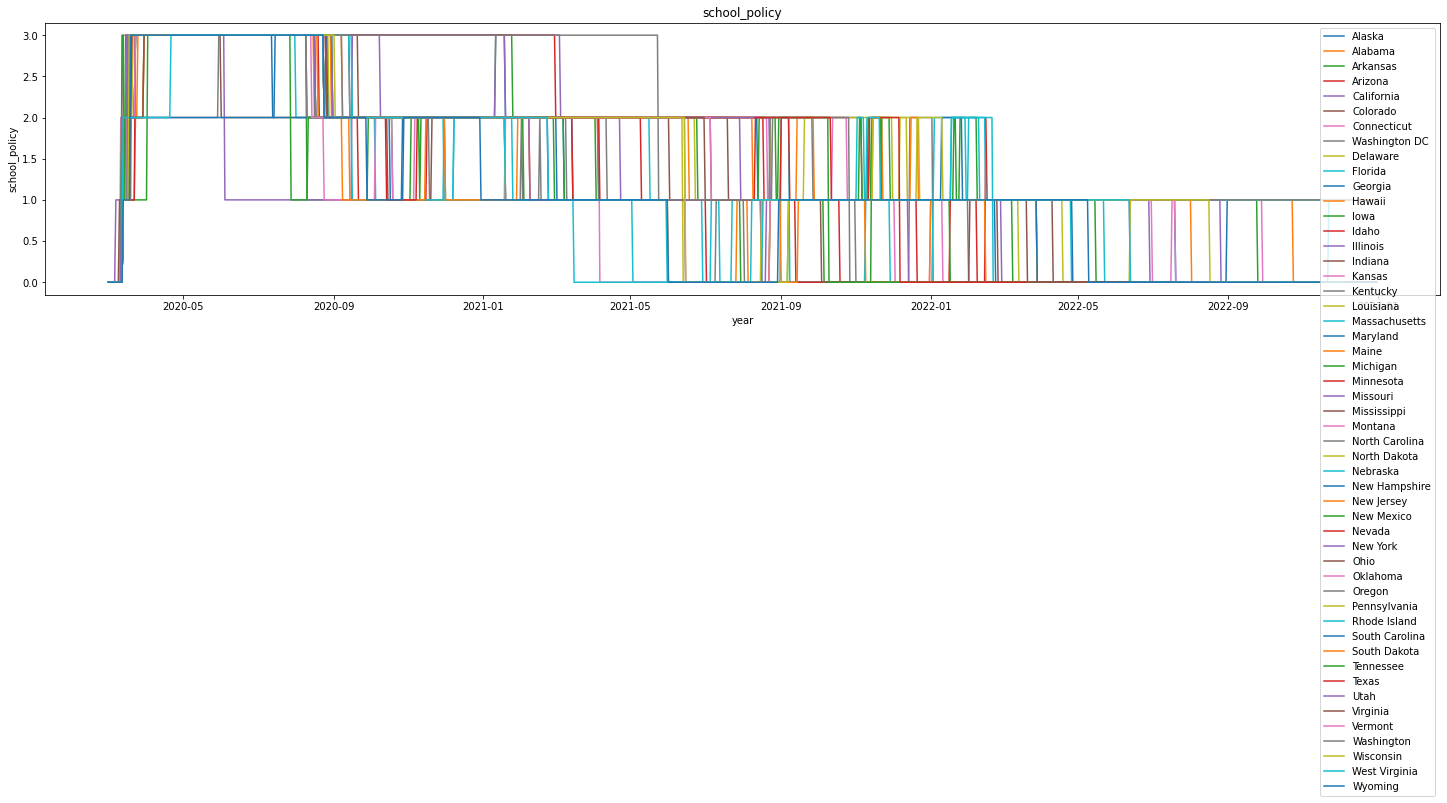

In [77]:
fig, (ax) = plt.subplots(1,figsize=(25,5))
for i in states_p:
  plt.plot(df_policy1[df_policy1['RegionName']==i]['C1M_School closing'],label=i)
  plt.xlabel('year')
  plt.ylabel('school_policy')
  plt.title('school_policy')
  plt.legend(loc='best')

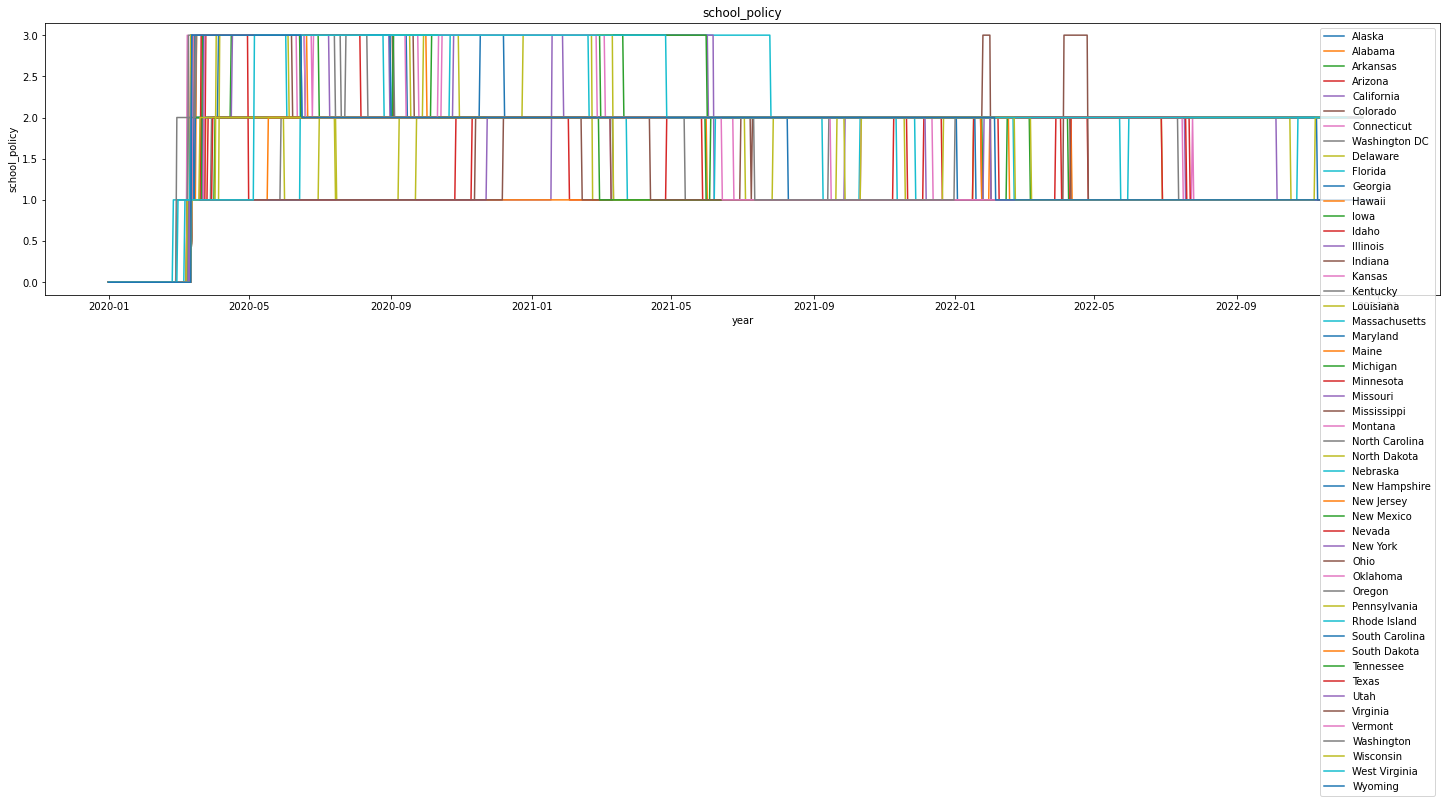

In [70]:
fig, (ax) = plt.subplots(1,figsize=(25,5))
for i in states_p:
  plt.plot(df_policy1[df_policy1['RegionName']==i]['H8M_Protection of elderly people'],label=i)
  plt.xlabel('year')
  plt.ylabel('school_policy')
  plt.title('school_policy')
  plt.legend(loc='best')

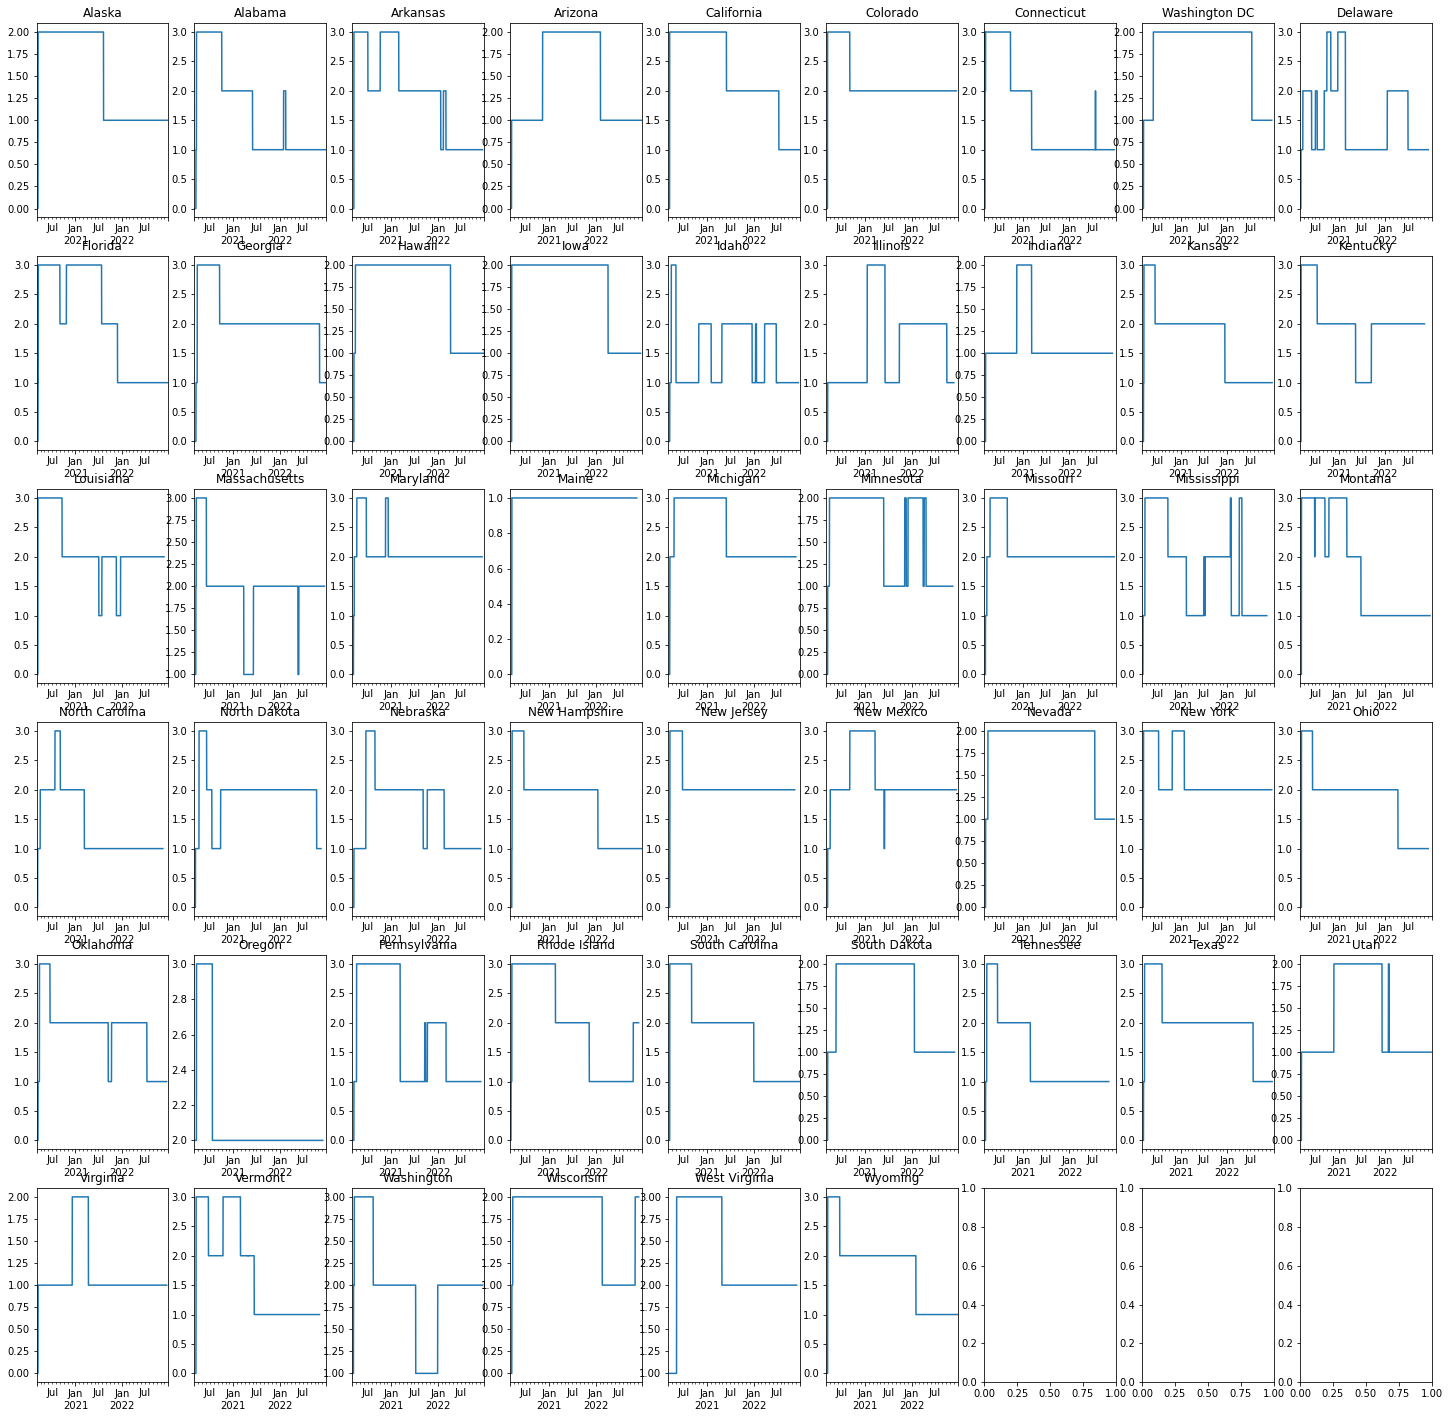

In [87]:
nrow=6
ncol=9
i=0
fig, axes = plt.subplots(nrow, ncol,figsize=(25,25))
for r in range(nrow):
  for c in range(ncol):
    df_policy1[df_policy1['RegionName']==states_p[i]]['H8M_Protection of elderly people'].plot(ax=axes[r,c],title=states_p[i],xlabel='')
    if i ==len(states_p)-1:
      break
    i+=1

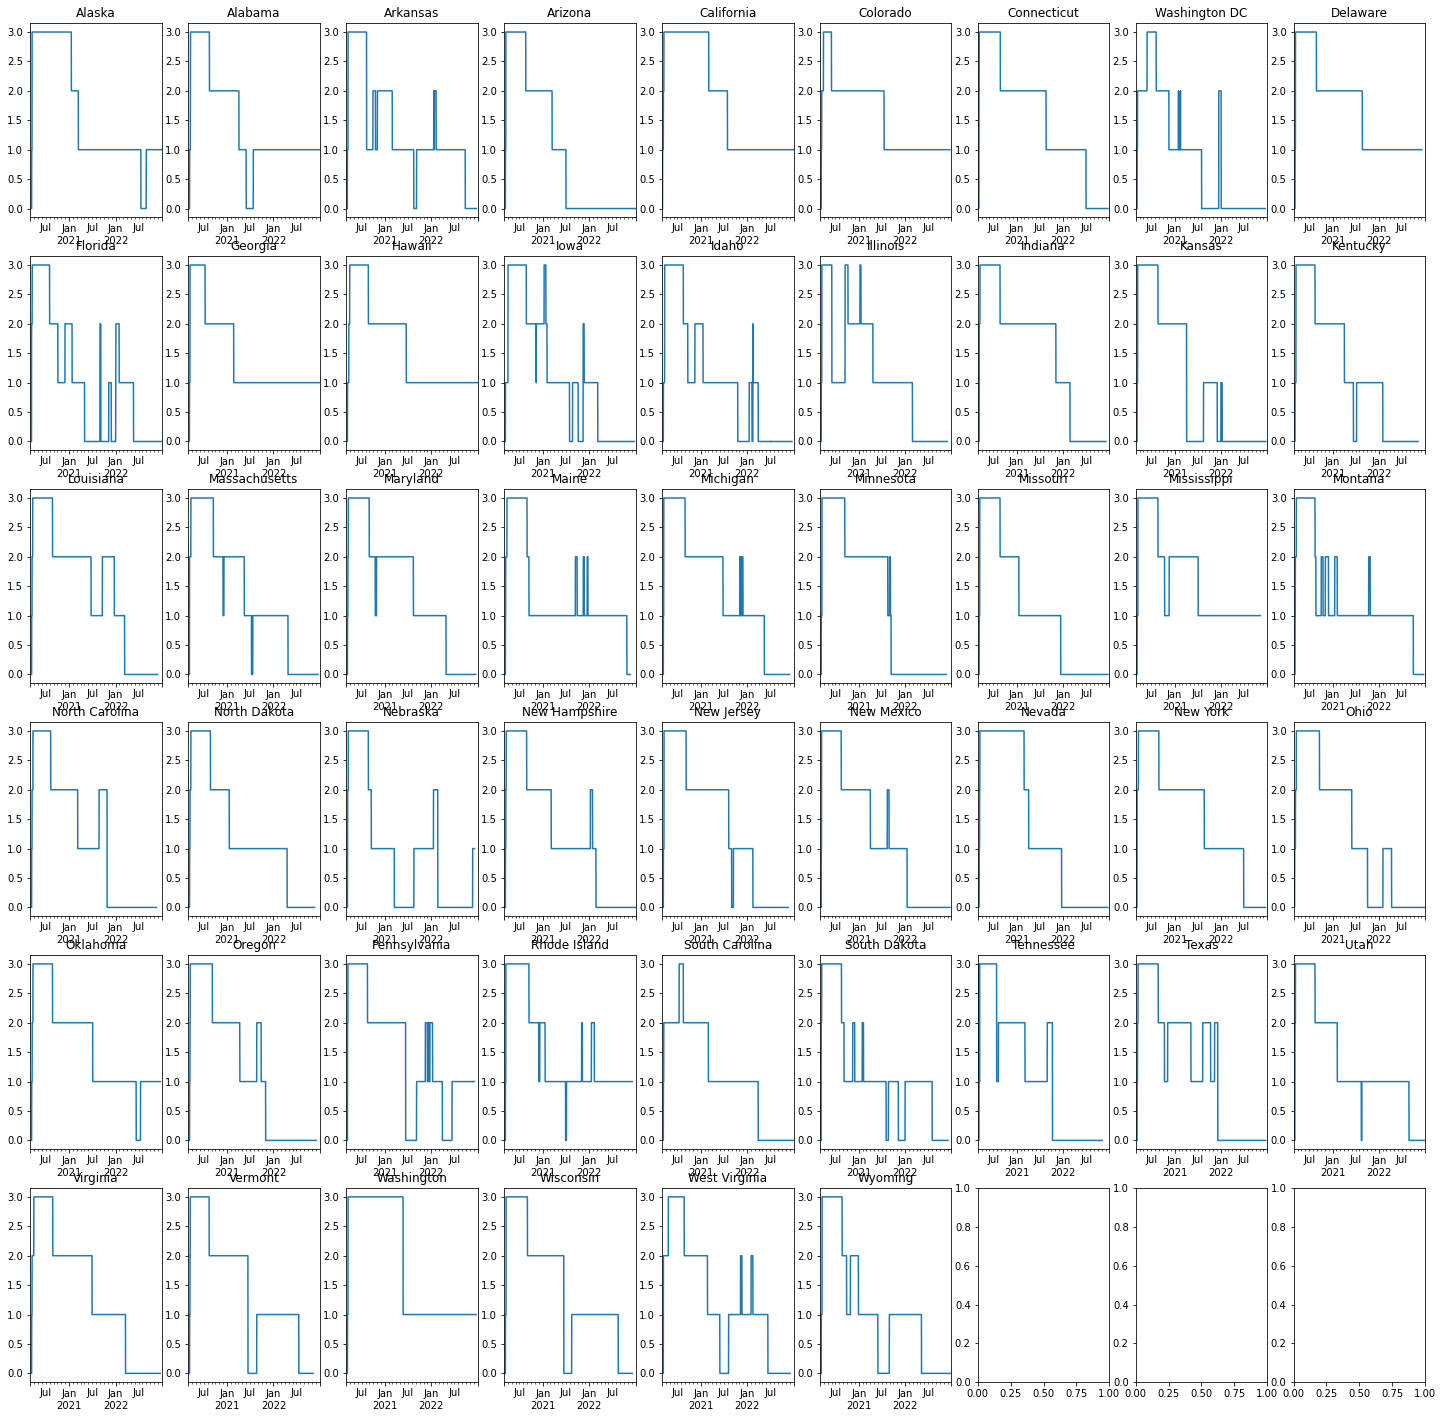

In [88]:
nrow=6
ncol=9
i=0
fig, axes = plt.subplots(nrow, ncol,figsize=(25,25))
for r in range(nrow):
  for c in range(ncol):
    df_policy1[df_policy1['RegionName']==states_p[i]]['C1M_School closing'].plot(ax=axes[r,c],title=states_p[i],xlabel='')
    if i ==len(states_p)-1:
      break
    i+=1